# Working with Complex Data Types & VMaps

## Setup

In order to work with complex data types in VerticaPy, you'll need to complete the following three setup tasks: 

<ul class="ul_content">
<li>Import relevant libraries:</li>
</ul>

In [1]:
import verticapy as vp

<ul class="ul_content">
<li>Connect to Vertica:</li>
</ul>

In [ ]:
vp.new_connection({"host": "10.211.55.14", 
                   "port": "5433", 
                   "database": "testdb", 
                   "password": "XxX", 
                   "user": "dbadmin"},
                   name = "Vertica_New_Connection")

<ul class="ul_content">
<li>Check your VerticaPy version to make sure you have access to the right functions:</li>
</ul>

In [2]:
vp.__version__

'0.11.0'

You can make it easier to keep track of your work by creating a custom schema:
<br><b>Note:</b> Because some tables are repeated in this demonstration, tables with the same names are dropped.

In [3]:
vp.drop("complex_vmap_test", method = "schema")
vp.create_schema("complex_vmap_test")

True

We also set the path to our data:

In [ ]:
path= "/home/dbadmin/"

You can download the demo datasets by clicking <a href="datasets.zip">here</a>.

## Loading Complex Data

There are two ways to load a nested data file:

<ul class="ul_content">
<li><b>Load directly using <a href="../../../documentation_last/utilities/read_json/index.php">read_json</a></b>. In this case, you will need to use an additional parameter to identify all the data types. The function loads the data using flex tables and VMaps (Native Vertica MAPS, which are flexible but not optimally performant).</li>
<li><b>Load using <a href="../../../documentation_last/utilities/read_file/index.php">read_file</a></b>. The function preidcts the complex data structure.</li>
</ul>

Let's try both:

away_score                                 away_team                               competition   \\
1              0  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
2              0  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
3              0  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
4              0  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
5              0  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
6              0  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
7              1  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
8              2  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
9              2  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
10             4  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
11             6  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
12             0  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
13             1  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
14             2  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
15             2  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
16             6  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
17             1  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
18             1  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
19             2  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
20             2  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
21             3  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
22             0  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
23             0  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
24             1  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
25             1  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
26             2  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
27             2  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
28             2  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
29             3  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
30             3  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
31             3  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
                        competition_stage    home_score                                 home_team   \\
1     b'{"id":1,"name":"Regular Season"}'             1  b'{"country":{"id":214,"name":"Spain"...   \\
2     b'{"id":1,"name":"Regular Season"}'             2  b'{"country":{"id":214,"name":"Spain"...   \\
3     b'{"id":1,"name":"Regular Season"}'             2  b'{"country":{"id":214,"name":"Spain"...   \\
4     b'{"id":1,"name":"Regular Season"}'             5  b'{"country":{"id":214,"name":"Spain"...   \\
5     b'{"id":1,"name":"Regular Season"}'             5  b'{"country":{"id":214,"name":"Spain"...  
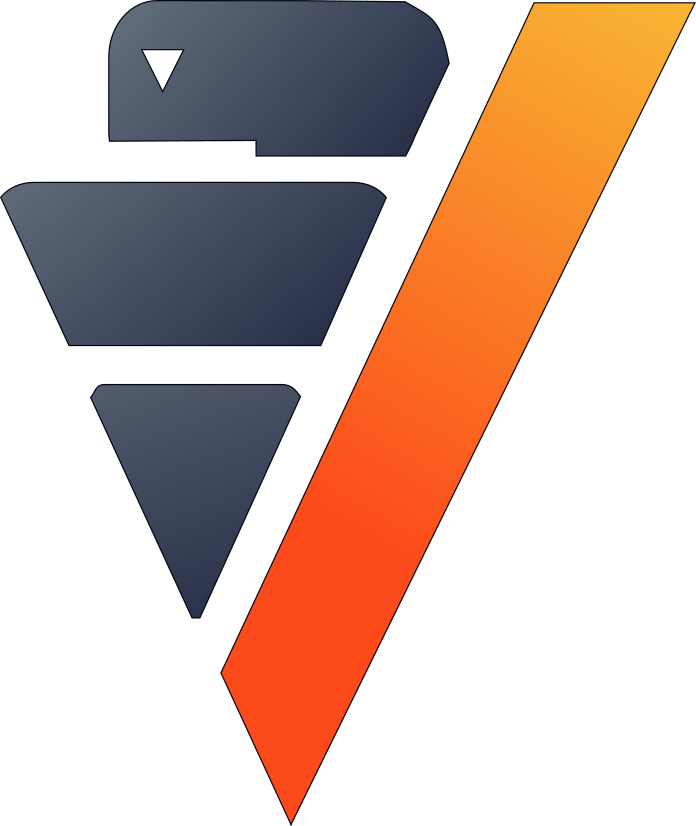

In [4]:
import verticapy as vp
data = vp.read_json(path + "laliga/2008.json",
                    schema = "public",
                    ingest_local = False,
                    use_complex_dt = True,)

Similar to the use of <a href="../../../documentation_last/utilities/read_json/index.php">read_json</a> above, we can use <a href="../../../documentation_last/utilities/read_file/index.php">read_file</a> to ingest the complex data directly:

away_score                                 away_team                               competition   \\
1              0  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
2              1  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
3              1  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
4              3  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
5              0  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
6              2  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
7              3  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
8              3  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
9              1  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
10             2  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
11             3  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
12             0  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
13             0  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
14             1  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
15             2  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
16             2  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
17             3  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
                        competition_stage    home_score                                 home_team   \\
1     b'{"id":1,"name":"Regular Season"}'             3  b'{"country":{"id":214,"name":"Spain"...   \\
2     b'{"id":1,"name":"Regular Season"}'             2  b'{"country":{"id":214,"name":"Spain"...   \\
3     b'{"id":1,"name":"Regular Season"}'             5  b'{"country":{"id":214,"name":"Spain"...   \\
4     b'{"id":1,"name":"Regular Season"}'             1  b'{"country":{"id":214,"name":"Spain"...   \\
5     b'{"id":1,"name":"Regular Season"}'             2  b'{"country":{"id":214,"name":"Spain"...   \\
6     b'{"id":1,"name":"Regular Season"}'             0  b'{"country":{"id":214,"name":"Spain"...   \\
7     b'{"id":1,"name":"Regular Season"}'             0  b'{"country":{"id":214,"name":"Spain"...   \\
8     b'{"id":1,"name":"Regular Season"}'             1  b'{"country":{"id":214,"name":"Spain"...   \\
9     b'{"id":1,"name":"Regular Season"}'             4  b'{"country":{"id":214,"name":"Spain"...   \\
10    b'{"id":1,"name":"Regular Season"}'             0  b'{"country":{"id":214,"name":"Spain"...   \\
11    b'{"id":1,"name":"Regular Season"}'             0  b'{"country":{"id":214,"name":"Spain"...   \\
12    b'{"id":1,"name":"Regular Season"}'             2  b'{"country":{"id":214,"name":"Spain"...   \\
13    b'{"id":1,"name":"Regular Season"}'             2  b'{"country":{"id":214,"name":"Spain"...   \\
14    b'{"id":1,"name":"Regular Season"}'             2  b'{"country":{"id":214,"name":"Spain"...   \\
15    b'{"id":1,"name":"Regular Season"}'             1  b'{"country":{"id":214,"name":"Spain"...   \\
16    b'{"id":1,"name":"Regular Season"}'             2  b'{"country":{"id":214,"name":"Spain"...   \\
17    b'{"id":1,"name":"Regular Season"}'             1  b'{"country":{"id":214,"name":"Spain"...   \\
      kick_off    last_updated    match_date    match_id   \\
1     22:00:00      2019-12-16    2005-10-22       68318   \\
2     19:00:00      2019-12-16    2006-01-15       68342   \\
3     22:00:00      2019-12-16    2006-02-18       69172  
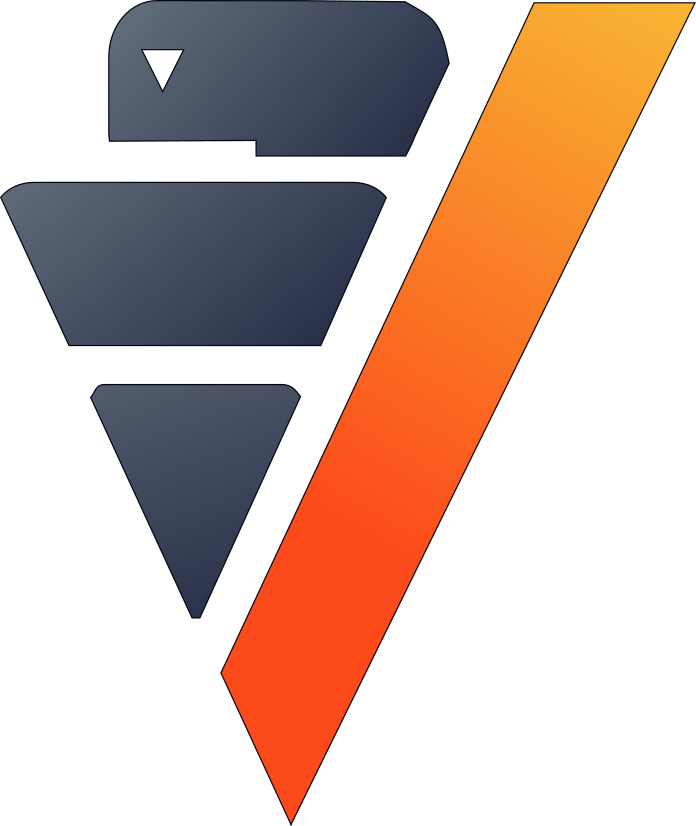

In [6]:
data = vp.read_file(path = path + "laliga/2005.json",
                    ingest_local = False,
                    schema = "complex_vmap_test",)
data

We can also use the handy 'genSQL' parameter to generate (but not execute) the SQL needed to create the final relation:
<br><b>Note:</b> This is a great way to customize the data ingestion or alter the final relation types.

In [9]:
sql = vp.read_file(path = path + "laliga/2005.json",
                   schema = "complex_vmap_test",
                   table_name = "laliga_2005",
                   genSQL = True,
                   varchar_varbinary_length = 60,
                   ingest_local = False,
                   dtype = {"away_score": "float"})
for query in sql:
    print(query)

CREATE TABLE "complex_vmap_test"."laliga_2005"("away_score" float, "away_team" Row("away_team_gender" varchar(60), "away_team_group" varchar(60), "away_team_id" int, "away_team_name" varchar(60), "country" Row("id" int, "name" varchar(60))), "competition" Row("competition_id" int, "competition_name" varchar(60), "country_name" varchar(60)), "competition_stage" Row("id" int, "name" varchar(60)), "home_score" int, "home_team" Row("country" Row("id" int, "name" varchar(60)), "home_team_gender" varchar(60), "home_team_group" varchar(60), "home_team_id" int, "home_team_name" varchar(60)), "kick_off" time, "last_updated" date, "match_date" date, "match_id" int, "match_status" varchar(60), "match_week" int, "metadata" Row("data_version" date, "shot_fidelity_version" int, "xy_fidelity_version" int), "season" Row("season_id" int, "season_name" varchar(60)))
copy "complex_vmap_test"."laliga_2005" from '/scratch_b/qa/ericsson/laliga/2005.json' PARSER FJsonParser()


## Feature Exploration

<a id='row_cell'></a>
In the generated SQL from the above example, we can see that the away_team column is a ROW type with a complex structure consisting of many sub-columns. We can convert this column into a JSON and view its contents:

away_score                                 away_team                               competition   \\
1              0  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
2              0  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
3              0  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
4              0  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
5              1  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
6              1  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
7              1  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
8              1  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
9              2  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
10             2  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
11             2  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
12             2  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
13             3  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
14             3  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
15             3  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
16             3  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
17             3  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
                     competition_stage    home_score                                 home_team   \\
1     {"id":1,"name":"Regular Season"}             2  b'{"country":{"id":214,"name":"Spain"...   \\
2     {"id":1,"name":"Regular Season"}             2  b'{"country":{"id":214,"name":"Spain"...   \\
3     {"id":1,"name":"Regular Season"}             2  b'{"country":{"id":214,"name":"Spain"...   \\
4     {"id":1,"name":"Regular Season"}             3  b'{"country":{"id":214,"name":"Spain"...   \\
5     {"id":1,"name":"Regular Season"}             2  b'{"country":{"id":214,"name":"Spain"...   \\
6     {"id":1,"name":"Regular Season"}             2  b'{"country":{"id":214,"name":"Spain"...   \\
7     {"id":1,"name":"Regular Season"}             4  b'{"country":{"id":214,"name":"Spain"...   \\
8     {"id":1,"name":"Regular Season"}             5  b'{"country":{"id":214,"name":"Spain"...   \\
9     {"id":1,"name":"Regular Season"}             0  b'{"country":{"id":214,"name":"Spain"...   \\
10    {"id":1,"name":"Regular Season"}             0  b'{"country":{"id":214,"name":"Spain"...   \\
11    {"id":1,"name":"Regular Season"}             1  b'{"country":{"id":214,"name":"Spain"...   \\
12    {"id":1,"name":"Regular Season"}             2  b'{"country":{"id":214,"name":"Spain"...   \\
13    {"id":1,"name":"Regular Season"}             0  b'{"country":{"id":214,"name":"Spain"...   \\
14    {"id":1,"name":"Regular Season"}             0  b'{"country":{"id":214,"name":"Spain"...   \\
15    {"id":1,"name":"Regular Season"}             1  b'{"country":{"id":214,"name":"Spain"...   \\
16    {"id":1,"name":"Regular Season"}             1  b'{"country":{"id":214,"name":"Spain"...   \\
17    {"id":1,"name":"Regular Season"}             1  b'{"country":{"id":214,"name":"Spain"...   \\
      kick_off    last_updated    match_date    match_id   \\
1     19:00:00      2019-12-16    2006-01-22       68324   \\
2     20:30:00      2019-12-16    2005-10-26       69164   \\
3     21:00:00      2019-12-16    2005-12-20       68323   \\
4     22:00:00      2019-12-16    2005-10-22      
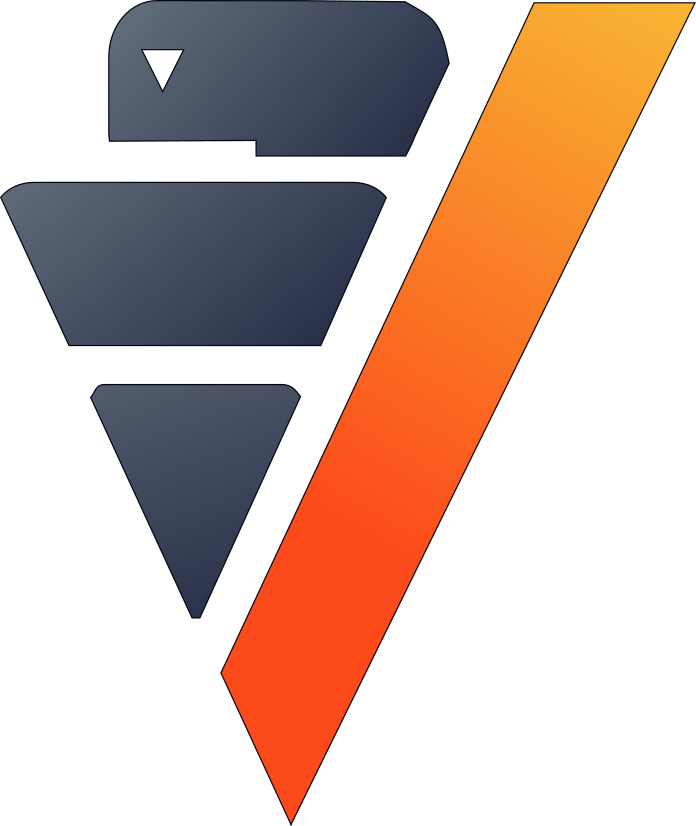

In [7]:
data["competition_stage"].astype("json")

As with a normal vDataFrame, we can easily extract the values from the sub-columns:

away_team_gender  
1                 male  
2                 male  
3                 male  
4                 male  
5                 male  
6                 male  
7                 male  
8                 male  
9                 male  
10                male  
11                male  
12                male  
13                male  
14                male  
15                male  
16                male  
17                male  
Rows: 17 | Column: away_team_gender | Type: Varchar(80)
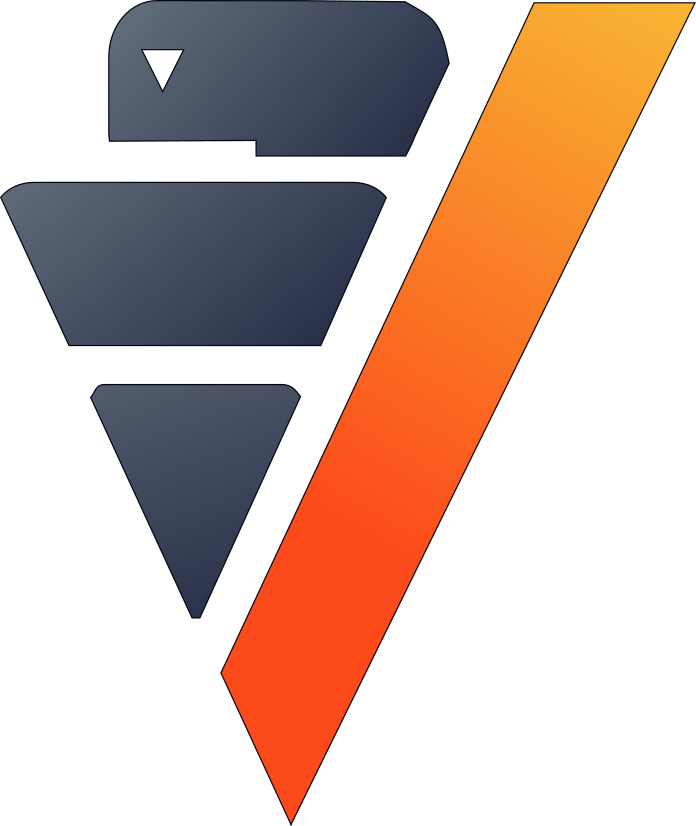

In [8]:
data["away_team"]["away_team_gender"]

We can view any nested data structure by index:

competition_id  
1                 11  
2                 11  
3                 11  
4                 11  
5                 11  
6                 11  
7                 11  
8                 11  
9                 11  
10                11  
11                11  
12                11  
13                11  
14                11  
15                11  
16                11  
17                11  
Rows: 17 | Column: competition_id | Type: Integer
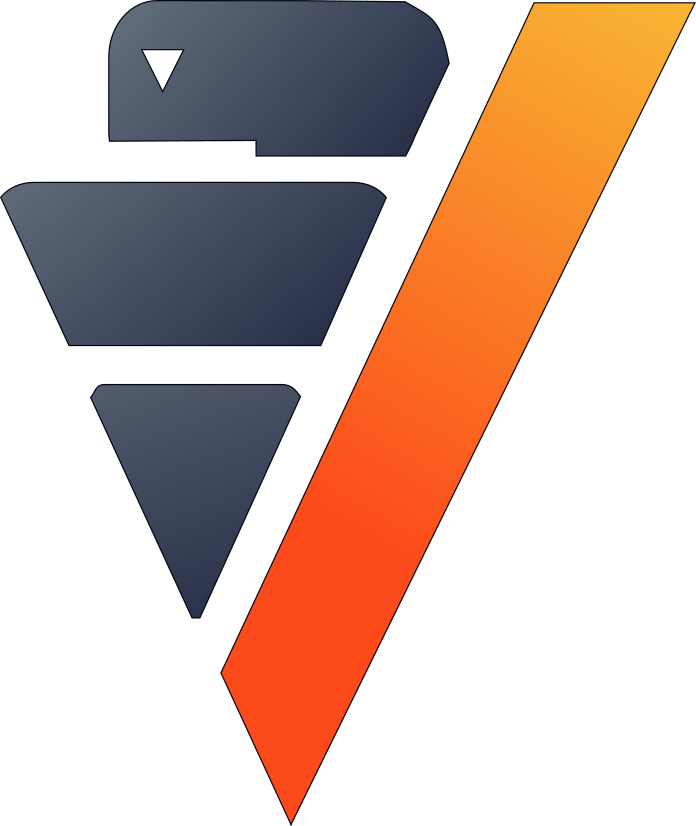

In [9]:
data["competition"]["competition_id"]

These nested structures can be used to create features:

In [10]:
data["name_home"] = data["home_team"]["home_team_name"]

We can even flatten the nested structure inside a json file, either flattening the entire file or just particular columns: 

The table "complex_vmap_test"."laliga_flat" has been successfully created.


home_team.managers                        away_team.managers   \\
1                                       None                                      None   \\
2   {
	"0.country.id": "214",
	"0.country...  {
	"0.country.id": "214",
	"0.country...   \\
3                                       None                                      None   \\
4                                       None                                      None   \\
5                                       None                                      None   \\
6   {
	"0.country.id": "214",
	"0.country...  {
	"0.country.id": "147",
	"0.country...   \\
7                                       None                                      None   \\
8                                       None                                      None   \\
9   {
	"0.country.id": "214",
	"0.country...  {
	"0.country.id": "214",
	"0.country...   \\
10  {
	"0.country.id": "214",
	"0.country...  {
	"0.country.id": "214",
	"0.country...   \\
11  {
	"0.country.id": "214",
	"0.country...  {
	"0.country.id": "214",
	"0.country...   \\
12  {
	"0.country.id": "214",
	"0.country...  {
	"0.country.id": "214",
	"0.country...   \\
13  {
	"0.country.id": "214",
	"0.country...  {
	"0.country.id": "214",
	"0.country...   \\
14  {
	"0.country.id": "45",
	"0.country....  {
	"0.country.id": "214",
	"0.country...   \\
15                                      None                                      None   \\
16  {
	"0.country.id": "214",
	"0.country...  {
	"0.country.id": "214",
	"0.country...   \\
17                                      None                                      None   \\
18  {
	"0.country.id": "214",
	"0.country...  {
	"0.country.id": "214",
	"0.country...   \\
19                                      None                                      None   \\
20                                      None                                      None   \\
21  {
	"0.country.id": "214",
	"0.country...  {
	"0.country.id": "11",
	"0.country....   \\
22                                      None                                      None   \\
23  {
	"0.country.id": "214",
	"0.country...  {
	"0.country.id": "214",
	"0.country...   \\
24                                      None                                      None   \\
25                                      None                                      None   \\
26  {
	"0.country.id": "214",
	"0.country...  {
	"0.country.id": "214",
	"0.country...   \\
27  {
	"0.country.id": "214",
	"0.country...  {
	"0.country.id": "214",
	"0.country...   \\
28                                      None                                      None   \\
29  {
	"0.country.id": "214",
	"0.country...  {
	"0.country.id": "214",
	"0.country...   \\
30  {
	"0.country.id": "214",
	"0.country...  {
	"0.country.id": "214",
	"0.country...   \\
31  {
	"0.country.id": "214",
	"0.country...  {
	"0.country.id": "45",
	"0.country....   \\
      season.season_name    season.season_id    metadata.xy_fidelity_version   \\
1              2008/2009                  41                               2   \\
2              2008/2009                  41                               2   \\
3              2008/2009                  41                               2   \\
4              2008/2009                  41                               2   \\
5              2008/2009                  41                               2   \\
6              2008/2009                  41                               2   \\
7              2008/2009                  41                               2   \\
8              2008/2009                  41                               2   \\
9              2008/2009                  41                               2   \\
10             2008/2009                  41                               2   \\
11             2008/2009                  41                               2   \\
12             2008/2009                  41                               2   \\
13             2
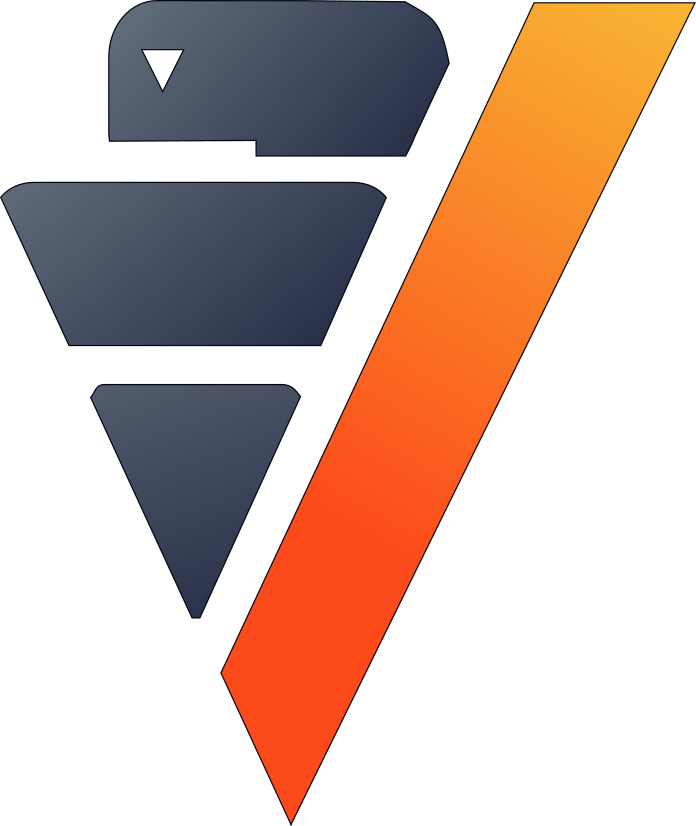

In [17]:
data = vp.read_json(path = path + "laliga/2008.json",
                    table_name = "laliga_flat",
                    schema = "complex_vmap_test",
                    ingest_local = False,
                    flatten_maps = True,)
data

We can see that all the columns from the JSON file have been flattened and multiple columns have been created for each sub-column. This causes some loss in data structure, but makes it easy to see the data and to use it for model building.

It is important to note that the data type of certain columns (home_team.managers) is now VMap, and not the ROW type that we saw in [the above cells](#row_cell). Even though both are used to capture nested data, there is in a subtle difference between the two. 

<b>VMap:</b> More flexible as it stores the data as a string of maps, allowing the ingestion of data in varying shapes. The shape is not fixed and new keys can easily be handled. This is a great option when we don't know the structure in advance, or if the structure changes over time.

<b>Row:</b> More rigid because the dictionaries, including all the data types, are fixed when they are defined. Newly parsed keys are ignored. But because of it's rigid structure, it is much more performant than VMaps. They are best used when the file structure is known in advance.

To deconvolve the nested structure, we can use the 'flatten_arrays' parameter in order to make the output strictly formatted. However, it can be an expensive process.

The table "complex_vmap_test"."laliga_flat" has been successfully created.


home_team.managers.0.nickname           home_team.managers.0.name   \\
1              José Luis Mendilibar     José Luis Mendilibar Etxebarria   \\
2                        Juan Muñiz              Juan Ramón López Muñiz   \\
3                      Juande Ramos          Juan de la Cruz Ramos Cano   \\
4                     Lucas Alcaraz         Luis Lucas Alcaraz González   \\
5                    Manolo Jiménez      Manuel Enrique Jiménez Jiménez   \\
6                 Manuel Pellegrini    Manuel Luis Pellegrini Ripamonti   \\
7                     Pep Guardiola              Josep Guardiola i Sala   \\
8                     Pep Guardiola              Josep Guardiola i Sala   \\
9                     Pep Guardiola              Josep Guardiola i Sala   \\
10                    Pep Guardiola              Josep Guardiola i Sala   \\
11                    Pep Guardiola              Josep Guardiola i Sala   \\
12                    Pep Guardiola              Josep Guardiola i Sala   \\
13                    Pep Guardiola              Josep Guardiola i Sala   \\
14                    Pep Guardiola              Josep Guardiola i Sala   \\
15                    Pep Guardiola              Josep Guardiola i Sala   \\
16                    Pep Guardiola              Josep Guardiola i Sala   \\
17                       Unai Emery                Unai Emery Etxegoien   \\
18                             None                                None   \\
19                             None                                None   \\
20                             None                                None   \\
21                             None                                None   \\
22                             None                                None   \\
23                             None                                None   \\
24                             None                                None   \\
25                             None                                None   \\
26                             None                                None   \\
27                             None                                None   \\
28                             None                                None   \\
29                             None                                None   \\
30                             None                                None   \\
31                             None                                None   \\
      home_team.managers.0.id    home_team.managers.0.dob    home_team.managers.0.country.name   \\
1                         221                        None                                Spain   \\
2                           2                  1968-11-02                                Spain   \\
3                        3899                        None                                Spain   \\
4                        1612                        None                                Spain   \\
5                        1621                  1964-01-26                                Spain   \\
6                         733                        None                                Chile   \\
7                          36                        None                                Spain   \\
8                          36                        None                                Spain   \\
9                          36                        None                                Spain   \\
10                         36                        None                                Spain   \\
11                         36                        None                                Spain   \\
12                         36                        None                                Spain   \\
13                         36                        None                                Spain   \\
14                         36                        None                                Spain   \\
15                         36             
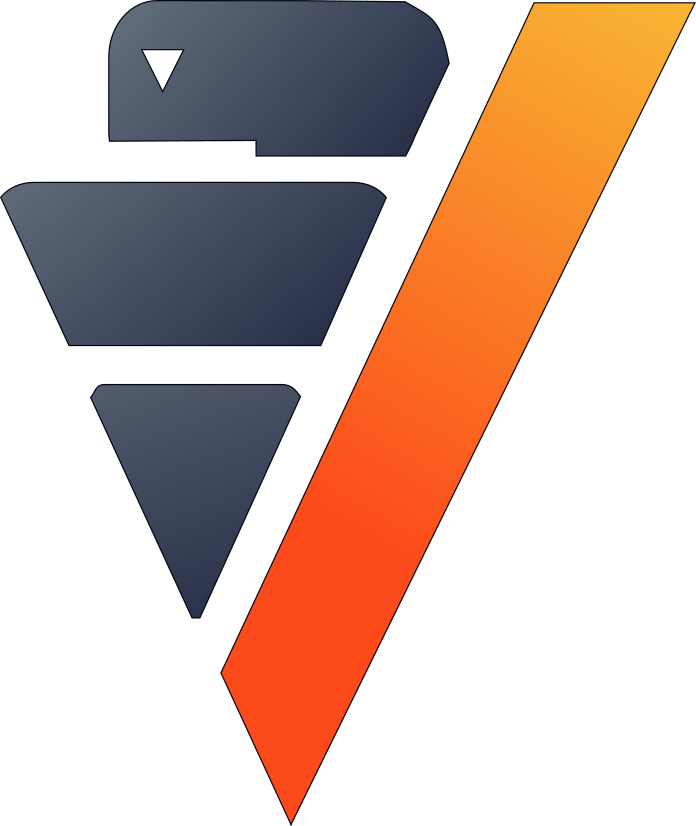

In [19]:
vp.drop("complex_vmap_test.laliga_flat")
data = vp.read_json(path = path + "laliga/2008.json",
                    table_name = "laliga_flat",
                    schema = "complex_vmap_test",
                    ingest_local = False,
                    flatten_arrays=True,)
data

We can even convert columns into other formats, such as string:

home_team.managers.0.nickname           home_team.managers.0.name   \\
1              José Luis Mendilibar     José Luis Mendilibar Etxebarria   \\
2                        Juan Muñiz              Juan Ramón López Muñiz   \\
3                      Juande Ramos          Juan de la Cruz Ramos Cano   \\
4                     Lucas Alcaraz         Luis Lucas Alcaraz González   \\
5                    Manolo Jiménez      Manuel Enrique Jiménez Jiménez   \\
6                 Manuel Pellegrini    Manuel Luis Pellegrini Ripamonti   \\
7                     Pep Guardiola              Josep Guardiola i Sala   \\
8                     Pep Guardiola              Josep Guardiola i Sala   \\
9                     Pep Guardiola              Josep Guardiola i Sala   \\
10                    Pep Guardiola              Josep Guardiola i Sala   \\
11                    Pep Guardiola              Josep Guardiola i Sala   \\
12                    Pep Guardiola              Josep Guardiola i Sala   \\
13                    Pep Guardiola              Josep Guardiola i Sala   \\
14                    Pep Guardiola              Josep Guardiola i Sala   \\
15                    Pep Guardiola              Josep Guardiola i Sala   \\
16                    Pep Guardiola              Josep Guardiola i Sala   \\
17                       Unai Emery                Unai Emery Etxegoien   \\
18                             None                                None   \\
19                             None                                None   \\
20                             None                                None   \\
21                             None                                None   \\
22                             None                                None   \\
23                             None                                None   \\
24                             None                                None   \\
25                             None                                None   \\
26                             None                                None   \\
27                             None                                None   \\
28                             None                                None   \\
29                             None                                None   \\
30                             None                                None   \\
31                             None                                None   \\
      home_team.managers.0.id    home_team.managers.0.dob    home_team.managers.0.country.name   \\
1                         221                        None                                Spain   \\
2                           2                  1968-11-02                                Spain   \\
3                        3899                        None                                Spain   \\
4                        1612                        None                                Spain   \\
5                        1621                  1964-01-26                                Spain   \\
6                         733                        None                                Chile   \\
7                          36                        None                                Spain   \\
8                          36                        None                                Spain   \\
9                          36                        None                                Spain   \\
10                         36                        None                                Spain   \\
11                         36                        None                                Spain   \\
12                         36                        None                                Spain   \\
13                         36                        None                                Spain   \\
14                         36                        None                                Spain   \\
15                         36             
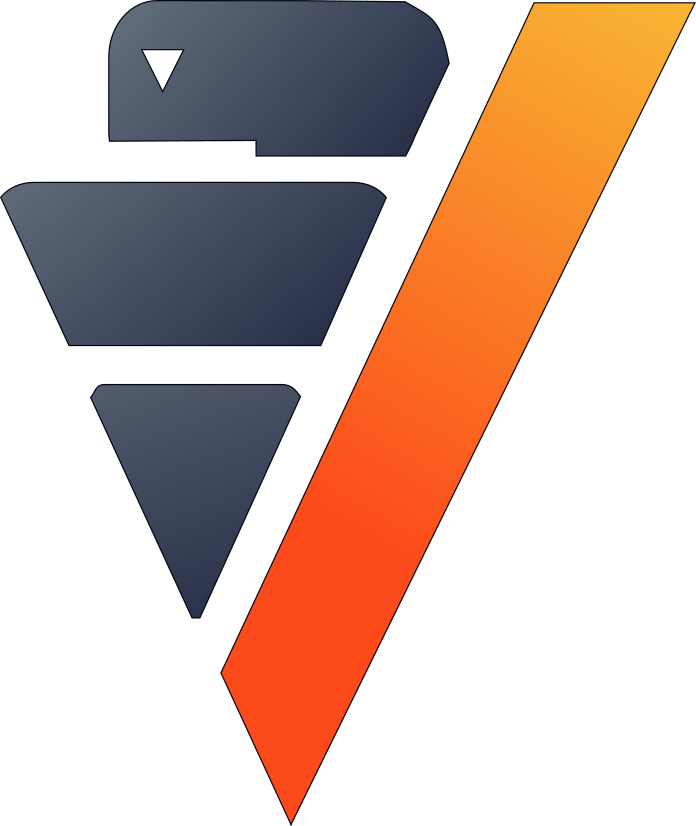

In [20]:
data["home_team.managers.0.nickname"].astype(str)

Or integer:

home_team.managers.0.nickname           home_team.managers.0.name   \\
1              José Luis Mendilibar     José Luis Mendilibar Etxebarria   \\
2                        Juan Muñiz              Juan Ramón López Muñiz   \\
3                      Juande Ramos          Juan de la Cruz Ramos Cano   \\
4                     Lucas Alcaraz         Luis Lucas Alcaraz González   \\
5                    Manolo Jiménez      Manuel Enrique Jiménez Jiménez   \\
6                 Manuel Pellegrini    Manuel Luis Pellegrini Ripamonti   \\
7                     Pep Guardiola              Josep Guardiola i Sala   \\
8                     Pep Guardiola              Josep Guardiola i Sala   \\
9                     Pep Guardiola              Josep Guardiola i Sala   \\
10                    Pep Guardiola              Josep Guardiola i Sala   \\
11                    Pep Guardiola              Josep Guardiola i Sala   \\
12                    Pep Guardiola              Josep Guardiola i Sala   \\
13                    Pep Guardiola              Josep Guardiola i Sala   \\
14                    Pep Guardiola              Josep Guardiola i Sala   \\
15                    Pep Guardiola              Josep Guardiola i Sala   \\
16                    Pep Guardiola              Josep Guardiola i Sala   \\
17                       Unai Emery                Unai Emery Etxegoien   \\
18                             None                                None   \\
19                             None                                None   \\
20                             None                                None   \\
21                             None                                None   \\
22                             None                                None   \\
23                             None                                None   \\
24                             None                                None   \\
25                             None                                None   \\
26                             None                                None   \\
27                             None                                None   \\
28                             None                                None   \\
29                             None                                None   \\
30                             None                                None   \\
31                             None                                None   \\
      home_team.managers.0.id    home_team.managers.0.dob    home_team.managers.0.country.name   \\
1                         221                        None                                Spain   \\
2                           2                  1968-11-02                                Spain   \\
3                        3899                        None                                Spain   \\
4                        1612                        None                                Spain   \\
5                        1621                  1964-01-26                                Spain   \\
6                         733                        None                                Chile   \\
7                          36                        None                                Spain   \\
8                          36                        None                                Spain   \\
9                          36                        None                                Spain   \\
10                         36                        None                                Spain   \\
11                         36                        None                                Spain   \\
12                         36                        None                                Spain   \\
13                         36                        None                                Spain   \\
14                         36                        None                                Spain   \\
15                         36             
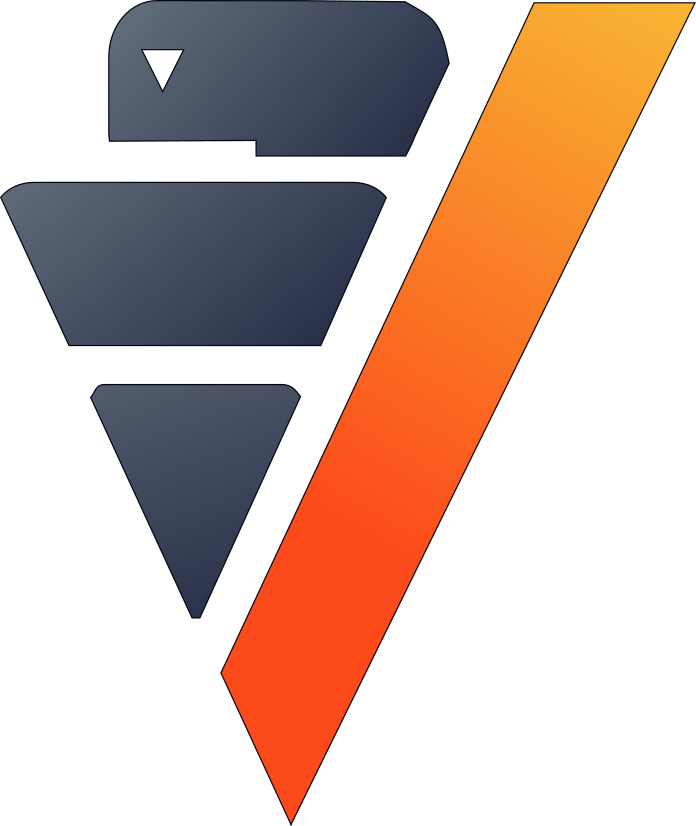

In [47]:
data["match_week"].astype(int)

It is also possible to:
<ul class="ul_content">
    <li>Cast str to array</li>
    <li>Cast complex data types to json str</li>
    <li>Cast str to VMAPs</li>
    <li>And much more...</li>
</ul>

## Multiple File Ingestion

If we have multiple files with the same extension, we can easily ingest them using the "*" operator:

away_score                                 away_team                               competition   \\
1               0  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
2               0  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
3               0  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
4               0  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
5               0  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
6               0  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
7               0  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
8               0  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
9               0  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
10              0  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
11              0  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
12              0  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
13              0  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
14              0  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
15              0  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
16              0  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
17              0  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
18              0  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
19              0  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
20              0  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
21              0  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
22              0  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
23              0  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
24              0  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
25              0  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
26              0  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
27              0  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
28              0  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
29              0  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
30              0  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
31              0  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
32              1  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
33              1  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
34              1  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
35              1  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
36              1  b'{"away_team_gender":"male","away_te...  b'{"competition_id":11,"competition_n...   \\
37              1  b'{"away_team_gender":"male",
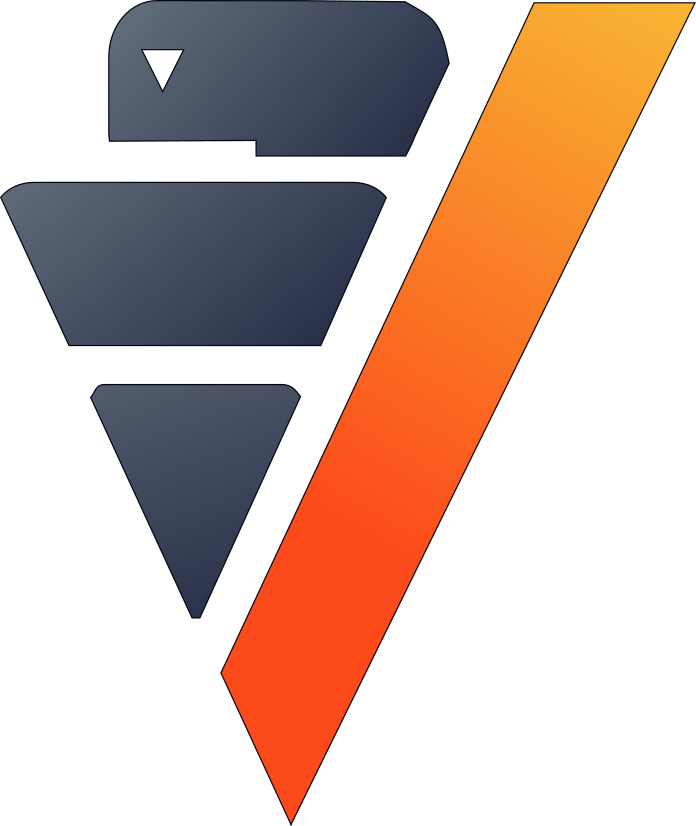

In [7]:
data = vp.read_file(path = path + "laliga/*.json",
                    table_name = "laliga_all",
                    ingest_local = False,
                    schema = "complex_vmap_test",)
data

We can also do this for other file types. For example, csv:

name                                  geometry  
1                  Abidjan  POINT (-4.041994118507091 5.321942826...  
2                  Abidjan  POINT (-4.041994118507091 5.321942826...  
3                Abu Dhabi  POINT (54.36659338259199 24.466683572...  
4                Abu Dhabi  POINT (54.36659338259199 24.466683572...  
5                    Abuja  POINT (7.53138214293233 9.08527900775...  
6                    Abuja  POINT (7.53138214293233 9.08527900775...  
7                    Accra  POINT (-0.2186615989606935 5.55198046...  
8                    Accra  POINT (-0.2186615989606935 5.55198046...  
9              Addis Ababa  POINT (38.69805857534868 9.0352562212...  
10             Addis Ababa  POINT (38.69805857534868 9.0352562212...  
11                 Algiers  POINT (3.048606670909237 36.765010656...  
12                 Algiers  POINT (3.048606670909237 36.765010656...  
13                   Amman  POINT (35.93135406687412 31.951971105...  
14                   Amman  POINT (35.93135406687412 31.951971105...  
15               Amsterdam  POINT (4.914694317400972 52.351914546...  
16               Amsterdam  POINT (4.914694317400972 52.351914546...  
17                 Andorra  POINT (1.51648596050552 42.5000014435...  
18                 Andorra  POINT (1.51648596050552 42.5000014435...  
19                  Ankara  POINT (32.86244578235664 39.929184444...  
20                  Ankara  POINT (32.86244578235664 39.929184444...  
21            Antananarivo  POINT (47.51467804152986 -18.91469149...  
22            Antananarivo  POINT (47.51467804152986 -18.91469149...  
23                    Apia  POINT (-171.7386416086032 -13.8415450...  
24                    Apia  POINT (-171.7386416086032 -13.8415450...  
25                Ashgabat  POINT (58.38329911177465 37.949994933...  
26                Ashgabat  POINT (58.38329911177465 37.949994933...  
27                  Asmara  POINT (38.93332352575931 15.333339252...  
28                  Asmara  POINT (38.93332352575931 15.333339252...  
29                  Astana  POINT (71.427774209483 51.18112530425...  
30                  Astana  POINT (71.427774209483 51.18112530425...  
31                Asuncion  POINT (-57.64345102790134 -25.2944571...  
32                Asuncion  POINT (-57.64345102790134 -25.2944571...  
33                  Athens  POINT (23.73137522567936 37.985272090...  
34                  Athens  POINT (23.73137522567936 37.985272090...  
35                 Baghdad  POINT (44.39192291456413 33.340594356...  
36                 Baghdad  POINT (44.39192291456413 33.340594356...  
37                    Baku  POINT (49.86027130325778 40.397217891...  
38                    Baku  POINT (49.86027130325778 40.397217891...  
39                  Bamako  POINT (-8.001984963249697 12.65196052...  
40                  Bamako  POINT (-8.001984963249697 12.65196052...  
41     Bandar Seri Begawan  POINT (114.9332840566623 4.8833311146...  
42     Bandar Seri Begawan  POINT (114.9332840566623 4.8833311146...  
43                 Bangkok  POINT (100.5146987936949 13.751945064...  
44                 Bangkok  POINT (100.5146987936949 13.751945064...  
45                  Bangui  POINT (18.55828812528728 4.3666443063...  
46                  Bangui  POINT (18.55828812528728 4.3666443063...  
47                  Banjul  POINT (-16.5917014892126 13.453876460...  
48                  Banjul  POINT (-16.5917014892126 13.453876460...  
49              Basseterre  POINT (-62.71700931969934 17.30203045...  
50              Basseterre  POINT (-62.71700931969934 17.30203045...  
51                 Beijing  POINT (116.3863398256594 39.930838089...  
52                 Beijing  POINT (116.3863398256594 39.930838089...  
53                  Beirut  POINT (35.50776235137766 33.873920975...  
54                  Beirut  POINT (35.50776235137766 33.873920975...  
55                Belgrade  POINT (20.46604482202054 44.820591304...  
56                Belgrade  POINT (20.46604482
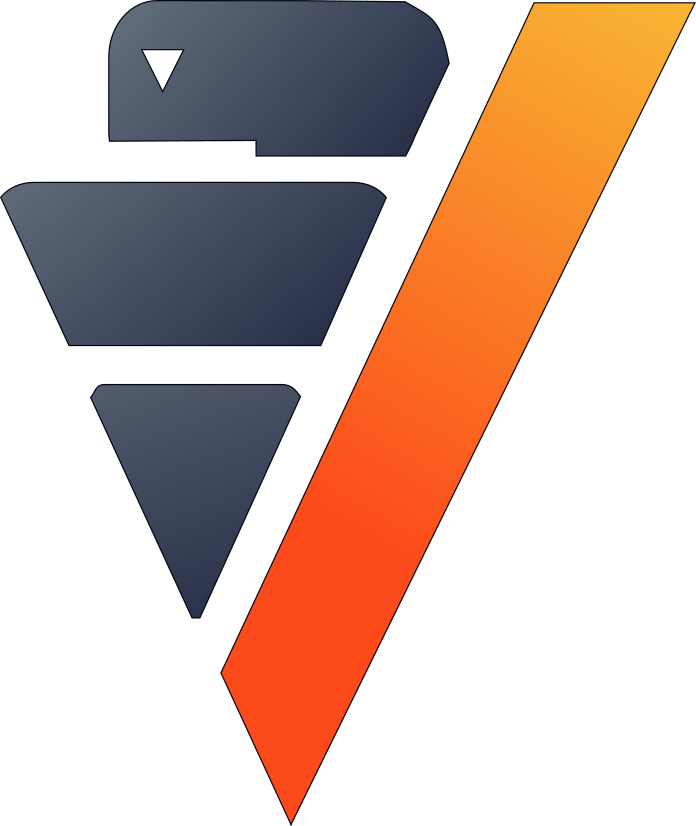

In [44]:
data = vp.read_csv(path = path + "*.csv",
                   table_name = "cities_all",
                   schema = "complex_vmap_test",
                   ingest_local = False,
                   insert = True)
data

Because we had copies of the same file, we can see that there are two records of each line. The ease of "*" allows us to ingest all the files in a particular folder.

## Materialize

When we do not materialize a table, it automatically becomes a flextable:

referee.country.id    referee.country.name    stadium.country.id   \\
1                    None                    None                  None   \\
2                    None                    None                  None   \\
3                    None                    None                  None   \\
4                    None                    None                  None   \\
5                    None                    None                  None   \\
6                    None                    None                  None   \\
7                    None                    None                  None   \\
8                    None                    None                  None   \\
9                    None                    None                  None   \\
10                   None                    None                  None   \\
11                   None                    None                  None   \\
12                   None                    None                  None   \\
13                   None                    None                  None   \\
14                   None                    None                  None   \\
15                   None                    None                  None   \\
16                   None                    None                  None   \\
17                   None                    None                  None   \\
18                   None                    None                  None   \\
19                   None                    None                  None   \\
20                   None                    None                  None   \\
21                   None                    None                  None   \\
22                   None                    None                  None   \\
23                   None                    None                  None   \\
24                   None                    None                  None   \\
25                   None                    None                  None   \\
26                   None                    None                  None   \\
27                   None                    None                  None   \\
28                   None                    None                  None   \\
29                   None                    None                  None   \\
30                   None                    None                  None   \\
31                   None                    None                  None   \\
32                   None                    None                  None   \\
33                   None                    None                  None   \\
34                   None                    None                  None   \\
35                   None                    None                  None   \\
36                   None                    None                  None   \\
37                   None                    None                  None   \\
38                   None                    None                  None   \\
39                   None                    None                  None   \\
40                   None                    None                  None   \\
41                   None                    None                  None   \\
42                   None                    None                  None   \\
43                   None                    None                  None   \\
44                   None                    None                  None   \\
45                   None                    None                  None   \\
46                   None                    None                  None   \\
47                   None                    None                  None   \\
48                   None                    None                  None   \\
49                   None                    None                  None   \\
50                   None                    None                  None   \\
51                   None                    None                  None   \\
52 
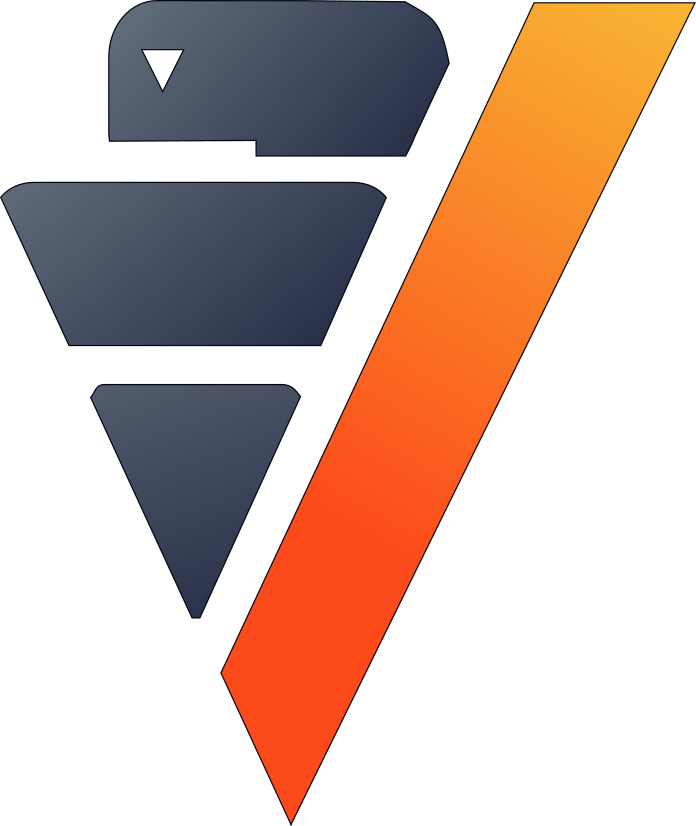

In [3]:
data = vp.read_json(path = path + "laliga/*.json",
                    table_name = "laliga_verticapy_test_json",
                    schema = "complex_vmap_test",
                    ingest_local = False,
                    materialize = False,)
data

Some of the columns are VMAPs:

In [11]:
managers = ["away_team.managers", "home_team.managers"]
for m in managers:
    print(data[m].isvmap())

True
True


We can easily flatten the VMaps virtual columns by using the vDataFrame.<a href="../../../documentation_last/vdataframe/main-methods/flat_vmap/index.php">flat_vmap</a> method:

referee.country.id    referee.country.name    stadium.country.id   \\
1                    None                    None                  None   \\
2                    None                    None                  None   \\
3                    None                    None                  None   \\
4                    None                    None                  None   \\
5                    None                    None                  None   \\
6                    None                    None                  None   \\
7                    None                    None                  None   \\
8                    None                    None                  None   \\
9                    None                    None                  None   \\
10                   None                    None                  None   \\
11                   None                    None                  None   \\
12                   None                    None                  None   \\
13                   None                    None                  None   \\
14                   None                    None                  None   \\
15                   None                    None                  None   \\
16                   None                    None                  None   \\
17                   None                    None                  None   \\
18                   None                    None                  None   \\
19                   None                    None                  None   \\
20                   None                    None                  None   \\
21                   None                    None                  None   \\
22                   None                    None                  None   \\
23                   None                    None                  None   \\
24                   None                    None                  None   \\
25                   None                    None                  None   \\
26                   None                    None                  None   \\
27                   None                    None                  None   \\
28                   None                    None                  None   \\
29                   None                    None                  None   \\
30                   None                    None                  None   \\
31                   None                    None                  None   \\
32                   None                    None                  None   \\
33                   None                    None                  None   \\
34                   None                    None                  None   \\
35                   None                    None                  None   \\
36                   None                    None                  None   \\
37                   None                    None                  None   \\
38                   None                    None                  None   \\
39                   None                    None                  None   \\
40                   None                    None                  None   \\
41                   None                    None                  None   \\
42                   None                    None                  None   \\
43                   None                    None                  None   \\
44                   None                    None                  None   \\
45                   None                    None                  None   \\
46                   None                    None                  None   \\
47                   None                    None                  None   \\
48                   None                    None                  None   \\
49                   None                    None                  None   \\
50                   None                    None                  None   \\
51                   None                    None                  None   \\
52 
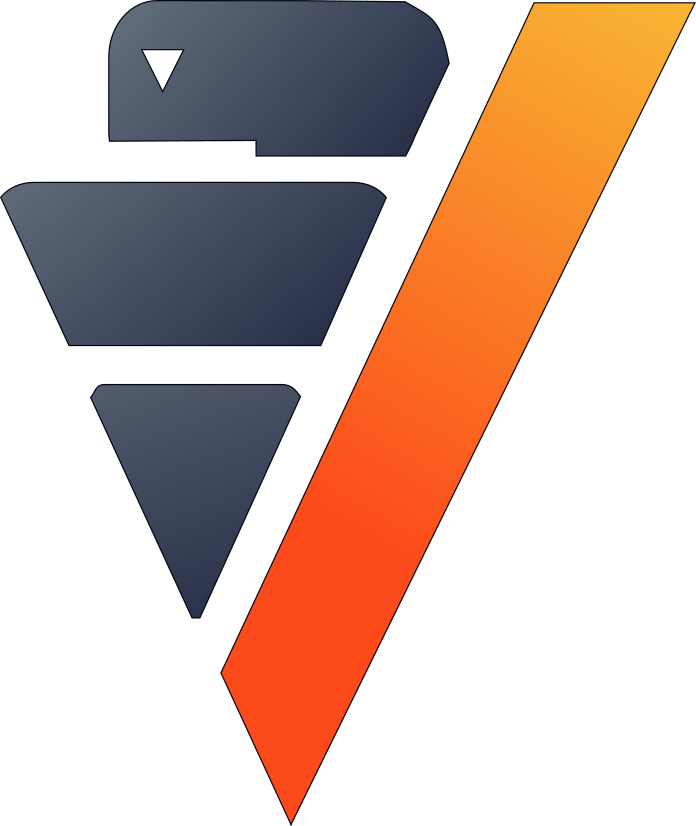

In [5]:
data.flat_vmap(managers).drop(managers)

To check for a flex table, we can use the following function:

In [46]:
isflextable(table_name = "laliga_verticapy_test_json", schema = "complex_vmap_test")

True

We can then manually materialize the flextable using the convenient vDataFrame.<a href="../../../documentation_last/vdataframe/main-methods/to_db/index.php">to_db</a> method:

season.season_name    season.season_id    metadata.xy_fidelity_version   \\
1              2005/2006                  38                               2   \\
2              2005/2006                  38                               2   \\
3              2005/2006                  38                               2   \\
4              2005/2006                  38                               2   \\
5              2005/2006                  38                               2   \\
6              2005/2006                  38                               2   \\
7              2005/2006                  38                               2   \\
8              2005/2006                  38                               2   \\
9              2005/2006                  38                               2   \\
10             2005/2006                  38                               2   \\
11             2005/2006                  38                               2   \\
12             2005/2006                  38                               2   \\
13             2005/2006                  38                               2   \\
14             2005/2006                  38                               2   \\
15             2005/2006                  38                               2   \\
16             2005/2006                  38                               2   \\
17             2005/2006                  38                               2   \\
      metadata.shot_fidelity_version    metadata.data_version    match_week   \\
1                                  2                    1.1.0            13   \\
2                                  2                    1.1.0            25   \\
3                                  2                    1.1.0            22   \\
4                                  2                    1.1.0            19   \\
5                                  2                    1.1.0            15   \\
6                                  2                    1.1.0            18   \\
7                                  2                    1.1.0            10   \\
8                                  2                    1.1.0            12   \\
9                                  2                    1.1.0             8   \\
10                                 2                    1.1.0            21   \\
11                                 2                    1.1.0            16   \\
12                                 2                    1.1.0             6   \\
13                                 2                    1.1.0            24   \\
14                                 2                    1.1.0            11   \\
15                                 2                    1.1.0            20   \\
16                                 2                    1.1.0            17   \\
17                                 2                    1.1.0            14   \\
      match_status    match_id    match_date                  last_updated   \\
1        available       68354    2005-11-27    2019-12-16T23:09:16.168756   \\
2        available       68351    2006-02-25    2019-12-16T23:09:16.168756   \\
3        available       68350    2006-02-05    2019-12-16T23:09:16.168756   \\
4        available       68342    2006-01-15    2019-12-16T23:09:16.168756   \\
5        available       68321    2005-12-11    2020-02-27T12:19:39.458017   \\
6        available       68348    2006-01-07    2019-12-16T23:09:16.168756   \\
7        available       68339    2005-11-06    2019-12-16T23:09:16.168756   \\
8        available       68319    2005-11-19    2019-12-16T23:09:16.168756   \\
9        available       68318    2005-10-22    2019-12-16T23:09:16.168756   \\
10       available       68325    2006-01-29    2019-12-16T23:09:16.168756   \\
11       available       68322    2005-12-17    2019-12-16T23:09:16.168756   \\
12       available       68317    2005-10-01    2019-12-16T23:09:16.168756   \\
13       available       69172  
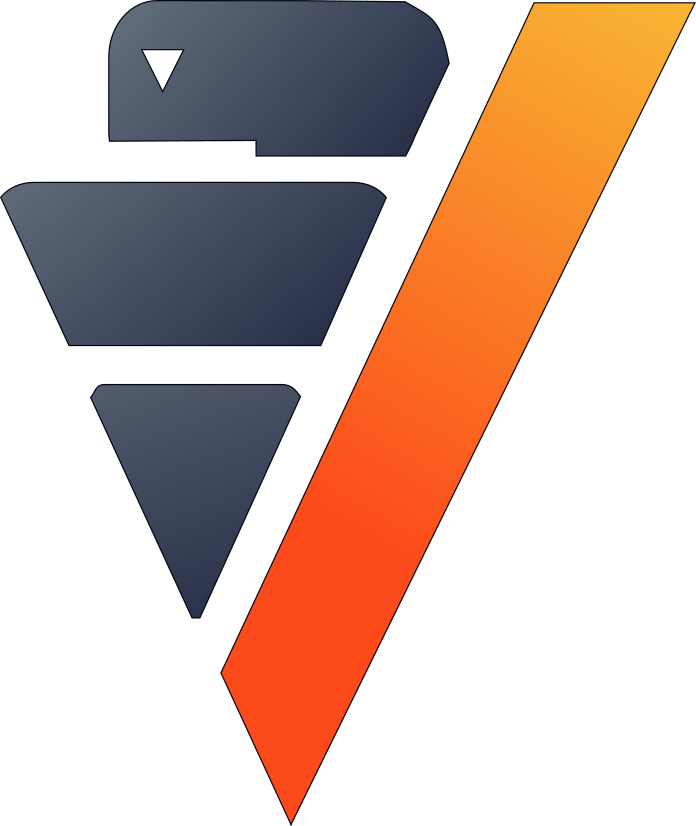

In [47]:
data.to_db("complex_vmap_test.laliga_to_db")

Once we have stored the database, we can easily create a vDataFrame of the relation:

season.season_name    season.season_id    metadata.xy_fidelity_version   \\
1              2005/2006                  38                               2   \\
2              2005/2006                  38                               2   \\
3              2005/2006                  38                               2   \\
4              2005/2006                  38                               2   \\
5              2005/2006                  38                               2   \\
6              2005/2006                  38                               2   \\
7              2005/2006                  38                               2   \\
8              2005/2006                  38                               2   \\
9              2005/2006                  38                               2   \\
10             2005/2006                  38                               2   \\
11             2005/2006                  38                               2   \\
12             2005/2006                  38                               2   \\
13             2005/2006                  38                               2   \\
14             2005/2006                  38                               2   \\
15             2005/2006                  38                               2   \\
16             2005/2006                  38                               2   \\
17             2005/2006                  38                               2   \\
      metadata.shot_fidelity_version    metadata.data_version    match_week   \\
1                                  2               2000-01-01            13   \\
2                                  2               2000-01-01            25   \\
3                                  2               2000-01-01            22   \\
4                                  2               2000-01-01            19   \\
5                                  2               2000-01-01            15   \\
6                                  2               2000-01-01            18   \\
7                                  2               2000-01-01            10   \\
8                                  2               2000-01-01            12   \\
9                                  2               2000-01-01             8   \\
10                                 2               2000-01-01            21   \\
11                                 2               2000-01-01            16   \\
12                                 2               2000-01-01             6   \\
13                                 2               2000-01-01            24   \\
14                                 2               2000-01-01            11   \\
15                                 2               2000-01-01            20   \\
16                                 2               2000-01-01            17   \\
17                                 2               2000-01-01            14   \\
      match_status    match_id    match_date                  last_updated   \\
1        available       68354    2005-11-27    2019-12-16 23:09:16.168756   \\
2        available       68351    2006-02-25    2019-12-16 23:09:16.168756   \\
3        available       68350    2006-02-05    2019-12-16 23:09:16.168756   \\
4        available       68342    2006-01-15    2019-12-16 23:09:16.168756   \\
5        available       68321    2005-12-11    2020-02-27 12:19:39.458017   \\
6        available       68348    2006-01-07    2019-12-16 23:09:16.168756   \\
7        available       68339    2005-11-06    2019-12-16 23:09:16.168756   \\
8        available       68319    2005-11-19    2019-12-16 23:09:16.168756   \\
9        available       68318    2005-10-22    2019-12-16 23:09:16.168756   \\
10       available       68325    2006-01-29    2019-12-16 23:09:16.168756   \\
11       available       68322    2005-12-17    2019-12-16 23:09:16.168756   \\
12       available       68317    2005-10-01    2019-12-16 23:09:16.168756   \\
13       available       69172  
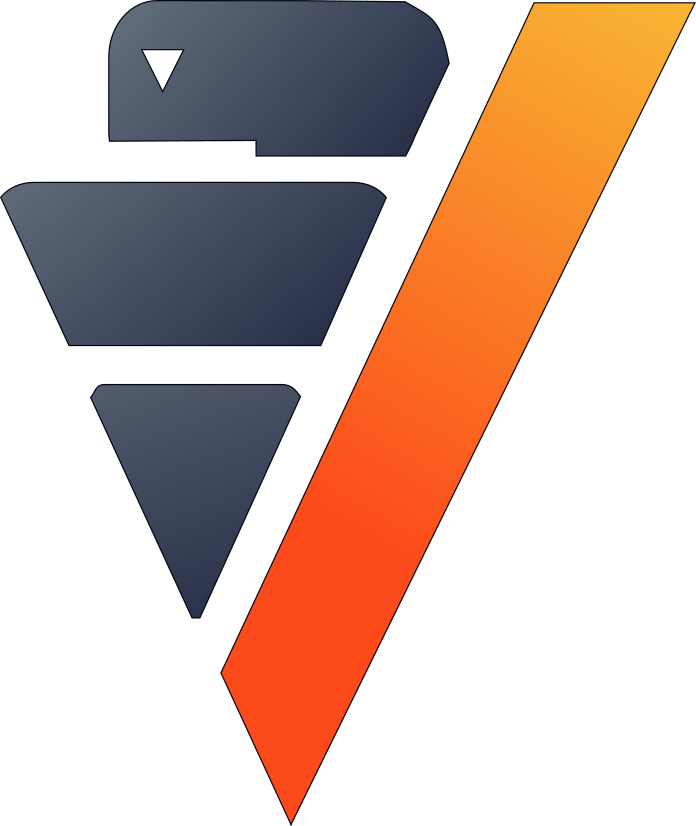

In [49]:
data_new = vp.vDataFrame("complex_vmap_test.laliga_to_db")
data_new

## Transformations

First, we load the dataset.

name                                  geometry  
1                  Abidjan  POINT (-4.041994118507091 5.321942826...  
2                Abu Dhabi  POINT (54.36659338259199 24.466683572...  
3                    Abuja  POINT (7.53138214293233 9.08527900775...  
4                    Accra  POINT (-0.2186615989606935 5.55198046...  
5              Addis Ababa  POINT (38.69805857534868 9.0352562212...  
6                  Algiers  POINT (3.048606670909237 36.765010656...  
7                    Amman  POINT (35.93135406687412 31.951971105...  
8                Amsterdam  POINT (4.914694317400972 52.351914546...  
9                  Andorra  POINT (1.51648596050552 42.5000014435...  
10                  Ankara  POINT (32.86244578235664 39.929184444...  
11            Antananarivo  POINT (47.51467804152986 -18.91469149...  
12                    Apia  POINT (-171.7386416086032 -13.8415450...  
13                Ashgabat  POINT (58.38329911177465 37.949994933...  
14                  Asmara  POINT (38.93332352575931 15.333339252...  
15                  Astana  POINT (71.427774209483 51.18112530425...  
16                Asuncion  POINT (-57.64345102790134 -25.2944571...  
17                  Athens  POINT (23.73137522567936 37.985272090...  
18                 Baghdad  POINT (44.39192291456413 33.340594356...  
19                    Baku  POINT (49.86027130325778 40.397217891...  
20                  Bamako  POINT (-8.001984963249697 12.65196052...  
21     Bandar Seri Begawan  POINT (114.9332840566623 4.8833311146...  
22                 Bangkok  POINT (100.5146987936949 13.751945064...  
23                  Bangui  POINT (18.55828812528728 4.3666443063...  
24                  Banjul  POINT (-16.5917014892126 13.453876460...  
25              Basseterre  POINT (-62.71700931969934 17.30203045...  
26                 Beijing  POINT (116.3863398256594 39.930838089...  
27                  Beirut  POINT (35.50776235137766 33.873920975...  
28                Belgrade  POINT (20.46604482202054 44.820591304...  
29                Belmopan  POINT (-88.76707299981655 17.25203350...  
30                  Berlin  POINT (13.39960276470055 52.523764522...  
31                    Bern  POINT (7.466975462482424 46.916682758...  
32                 Bishkek  POINT (74.58325836390367 42.875025305...  
33                  Bissau  POINT (-15.59836084132075 11.86502382...  
34            Bloemfontein  POINT (26.22991288117737 -29.11999387...  
35                  Bogota  POINT (-74.08528981377441 4.598369421...  
36                Brasilia  POINT (-47.91799814700306 -15.7813943...  
37              Bratislava  POINT (17.11698075223461 48.150018329...  
38             Brazzaville  POINT (15.28274363384867 -4.257239913...  
39              Bridgetown  POINT (-59.61652673505159 13.10200258...  
40                Brussels  POINT (4.33137074969045 50.8352629353...  
41               Bucharest  POINT (26.0980007953504 44.4353176634...  
42                Budapest  POINT (19.08137481875968 47.501952184...  
43            Buenos Aires  POINT (-58.39947723233144 -34.6005557...  
44               Bujumbura  POINT (29.3600060615284 -3.3760872203...  
45                   Cairo  POINT (31.24802236112612 30.051906205...  
46                Canberra  POINT (149.1290262442992 -35.28302854...  
47               Cape Town  POINT (18.43304229922603 -33.91806510...  
48                 Caracas  POINT (-66.91898305105042 10.50294441...  
49                Castries  POINT (-61.00000818036955 14.00197348...  
50                Chisinau  POINT (28.85771113965143 47.005023619...  
51                 Colombo  POINT (79.85775060925641 6.9319657581...  
52                 Conakry  POINT (-13.68218088612394 9.533468705...  
53                 Cotonou  POINT (2.518044740568598 6.4019544227...  
54                   Dakar  POINT (-17.47507598705056 14.71777758...  
55                Damascus  POINT (36.29805003041707 33.501979854...  
56           Dar es Salaam  POINT (39.26639597
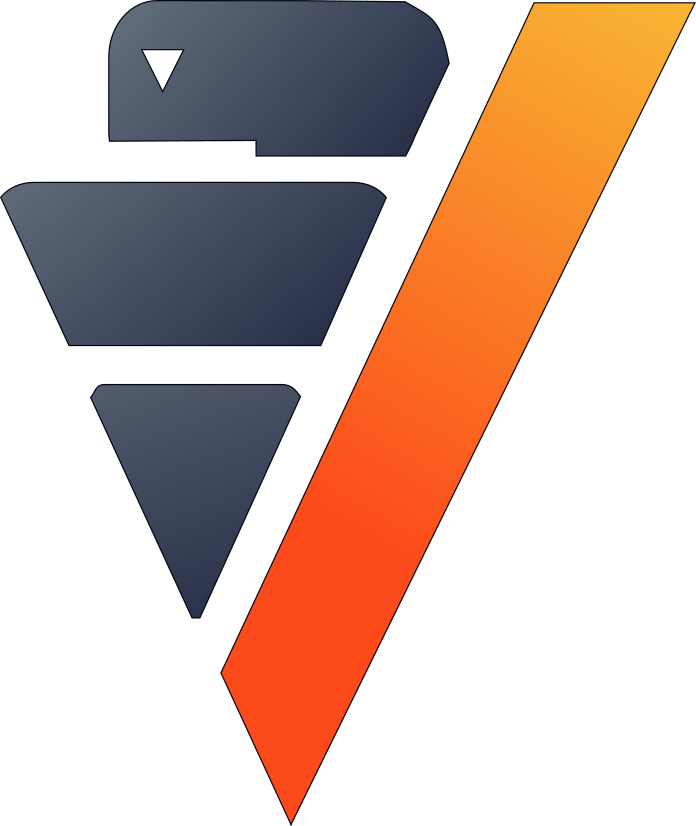

In [55]:
data = vp.read_csv(path = path + "cities.csv",
                   schema = "complex_vmap_test",
                   table_name = "cities_transf",
                   ingest_local = False,)
data

Once we have data in the form of vDataFrame, we can readily convert it to a JSON file:

In [56]:
data.to_json(path = "cities_json.json")

Now we can load the new JSON file and see the contents:


geometry                   name  
1    POINT (-0.1186677024759319 51.5019405...                 London  
2    POINT (-0.2186615989606935 5.55198046...                  Accra  
3    POINT (-1.526669614916443 12.37226183...            Ouagadougou  
4    POINT (-10.79966043677592 6.314581647...               Monrovia  
5    POINT (-13.23616159901275 8.471957271...               Freetown  
6    POINT (-13.68218088612394 9.533468705...                Conakry  
7    POINT (-15.59836084132075 11.86502382...                 Bissau  
8    POINT (-15.97534041489001 18.08642702...             Nouakchott  
9    POINT (-16.5917014892126 13.453876460...                 Banjul  
10   POINT (-17.47507598705056 14.71777758...                  Dakar  
11   POINT (-171.7386416086032 -13.8415450...                   Apia  
12   POINT (-175.2205644776166 -21.1385123...              Nukualofa  
13   POINT (-21.95001448717954 64.15002361...              Reykjavík  
14   POINT (-23.51668888497221 14.91669801...                  Praia  
15   POINT (-3.685297544612524 40.40197212...                 Madrid  
16   POINT (-4.041994118507091 5.321942826...                Abidjan  
17   POINT (-47.91799814700306 -15.7813943...               Brasilia  
18   POINT (-5.275502564912301 6.818380960...           Yamoussoukro  
19   POINT (-55.16703088542437 5.835030129...             Paramaribo  
20   POINT (-56.17299814703597 -34.8560957...             Montevideo  
21   POINT (-57.64345102790134 -25.2944571...               Asuncion  
22   POINT (-58.16702864748061 6.801973692...             Georgetown  
23   POINT (-58.39947723233144 -34.6005557...           Buenos Aires  
24   POINT (-59.61652673505159 13.10200258...             Bridgetown  
25   POINT (-6.250851540391068 53.33500699...                 Dublin  
26   POINT (-6.83640815612614 34.025307311...                  Rabat  
27   POINT (-61.00000818036955 14.00197348...               Castries  
28   POINT (-61.21206242027932 13.14827882...              Kingstown  
29   POINT (-61.38701298180337 15.30101564...                 Roseau  
30   POINT (-61.51703088544974 10.65199708...          Port-of-Spain  
31   POINT (-61.74164322607476 12.05263340...         Saint George's  
32   POINT (-61.85003381513866 17.11803651...           Saint John's  
33   POINT (-62.71700931969934 17.30203045...             Basseterre  
34   POINT (-65.25951562667564 -19.0409708...                  Sucre  
35   POINT (-66.91898305105042 10.50294441...                Caracas  
36   POINT (-68.15193104910219 -16.4960277...                 La Paz  
37   POINT (-69.90203094331503 18.47201871...          Santo Domingo  
38   POINT (-70.66898671317483 -33.4480679...               Santiago  
39   POINT (-72.33798044690553 18.54297045...         Port-au-Prince  
40   POINT (-74.08528981377441 4.598369421...                 Bogota  
41   POINT (-75.70196115980951 45.41864265...                 Ottawa  
42   POINT (-76.76743371366911 17.97707662...               Kingston  
43   POINT (-77.01136443943716 38.90149523...       Washington, D.C.  
44   POINT (-77.05200795343472 -12.0460668...                   Lima  
45   POINT (-77.35004378427612 25.08339011...                 Nassau  
46   POINT (-78.5019969671124 -0.213042322...                  Quito  
47   POINT (-79.53498301041077 8.969963049...            Panama City  
48   POINT (-8.001984963249697 12.65196052...                 Bamako  
49   POINT (-82.3661280299533 23.133904699...                 Havana  
50   POINT (-84.08599721127536 9.936958288...               San Jose  
51   POINT (-86.27043751890119 12.15496243...                Managua  
52   POINT (-87.21947519794151 14.10399075...            Tegucigalpa  
53   POINT (-88.76707299981655 17.25203350...               Belmopan  
54   POINT (-89.2049870794599 13.711947505...           San Salvador  
55   POINT (-9.14681216410213 38.724668736...                 Lisbon  
56   POINT (-90.52891143656154 14.62308052...              Gu
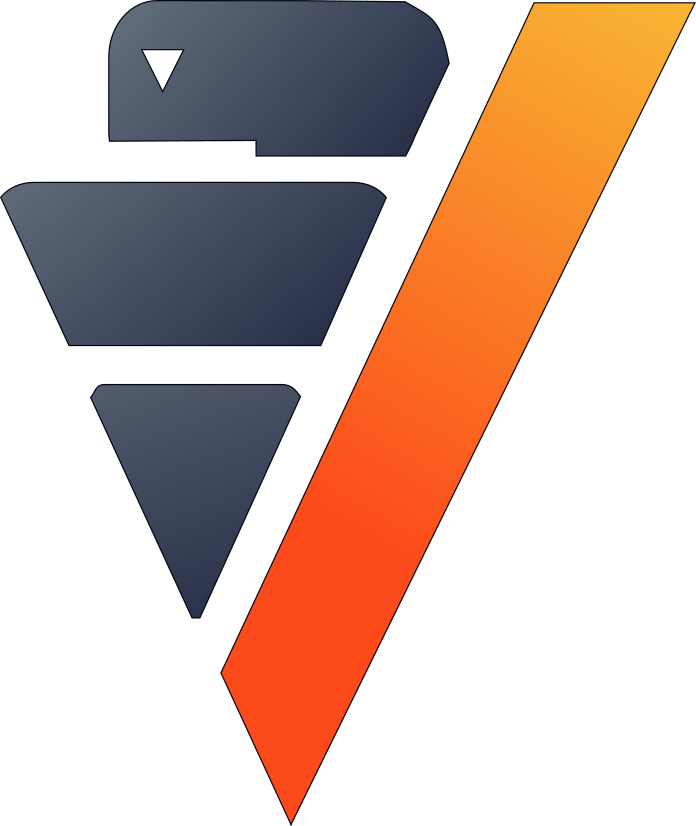

In [62]:
data = read_json(path = "cities_json.json",
                 schema = "complex_vmap_test",
                 table_name = "cities_transf_test",
                 ingest_local = False,)
data

We can even extract the JSON as string and edit it before saving it as a json file:

In [ ]:
json_str = data.to_json()

Let's look at the begining portion of the string:

In [67]:
json_str[0:100]

'[\n{"name": "Abidjan", "geometry": "POINT (-4.041994118507091 5.321942826098564)"},\n{"name": "Abu Dha'

We can edit a portion of the string and save it again. We'll change the name of the first city from Abidjan to Janabid:

In [68]:
json_str = json_str[:12] + 'JanAbid' + json_str[19:]

Now we can save this edited strings file:

In [ ]:
out_file = open("cities_edited.json", "w")
out_file.write(json_str)
out_file.close()

If we look at the new file, we can see the updated changes:

In [ ]:
data = vp.read_json(path = path + "cities_edited.json",
                    schema = "complex_vmap_test",
                    table_name = "cities_edit",
                    ingest_local = False,)

Let's search for the changed name:

geometry       name  
1  POINT (-4.041994118507091 5.321942826...    JanAbid  
Rows: 1-1 | Columns: 2
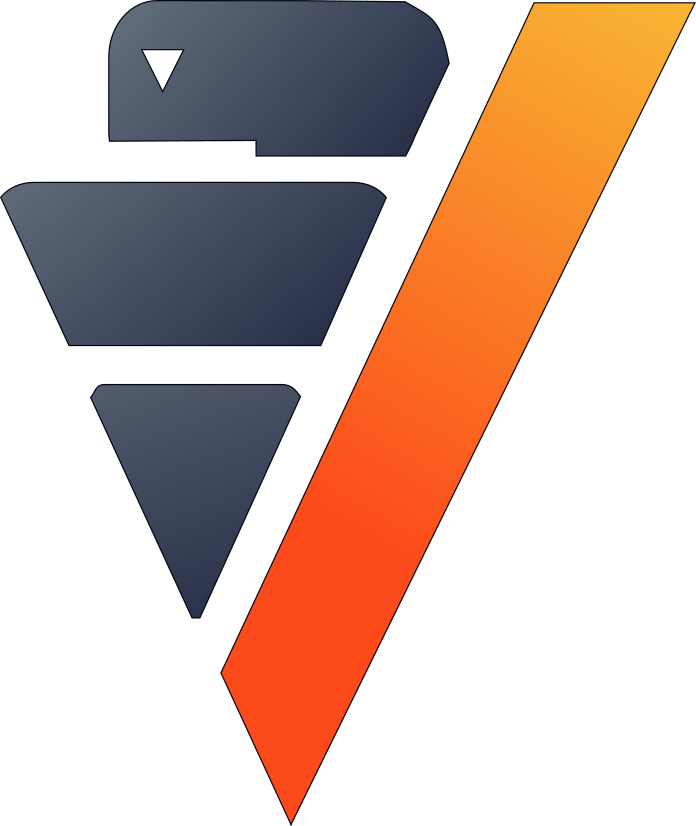

In [89]:
data[data["name"] == "JanAbid"]

Now to clean everything up, we can drop our temporary schema:

In [ ]:
vp.drop("complex_vmap_test", method = "schema")

## Conclusion

This new functionality not only make it easy to ingest complex data types in different formats, but it enables data wrangling like never before. 

The new features provide increased flexibility while keeping the process and syntax simple. You can do all of the following in VerticaPy:
<ul class="ul_content">
<li>Ingest complex datasets.</li>
<li>Perform convenient column operations.</li>
<li>Switch data types.</li>
<li>Flatten columns and maps into array like structures.</li>
</ul>